In [ ]:
%load_ext autoreload
%autoreload 2

import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(f"Adding parent directory to sys.path: {parent_dir}")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from src.utils import calculate_custom_score

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

Adding parent directory to sys.path: c:\Users\Łukasz\OneDrive - Politechnika Warszawska\MINI_1D\Semestr 8\Advanced ML\Project_2\AML_Feature_Selection


In [5]:
# Load the scaled dataset
data_path = '../data/scaled/'
X_train = pd.read_csv(data_path + 'x_train_scaled.txt', index_col=0, delimiter=' ')
y_train = pd.read_csv(data_path + 'y_train.txt', index_col=0, delimiter=' ', header=None, names=['target'])
X_val = pd.read_csv(data_path + 'x_val_scaled.txt', index_col=0, delimiter=' ')
y_val = pd.read_csv(data_path + 'y_val.txt', index_col=0, delimiter=' ', header=None, names=['target'])

display(X_train.head())
display(y_train.head())
display(X_val.head())
display(y_val.head())


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_490,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499
1796,-1.061760,-1.430582,-1.269855,-0.705374,-1.475228,-0.150262,-0.492853,-0.898017,-0.509204,-0.961760,...,-0.428594,-0.129728,1.770227,-1.641438,-0.694539,-1.101744,0.420421,-0.327320,1.109481,2.629266
3243,0.635321,0.173405,-0.459863,-0.492530,0.326602,-0.154819,-0.657300,0.327381,-0.862406,0.047546,...,0.720985,-0.447933,-1.201419,-0.931852,0.249667,2.052077,-1.233392,0.176505,-1.495024,-0.502881
2491,-1.556317,-1.179233,-1.646494,-1.840114,-1.433921,-1.911075,-1.584349,-1.848375,-1.193125,-1.170438,...,-0.105631,0.522542,-1.359657,-0.754821,-0.653445,-0.429249,0.692709,-0.009011,-1.643400,0.267704
2106,1.854008,2.473477,2.300627,2.290066,2.108822,1.339617,1.961996,2.177571,2.311000,2.343364,...,-0.306461,-0.525729,0.574375,-1.000787,0.509626,-1.543840,-1.330246,1.651928,-0.710540,0.400211
1644,1.246549,1.573811,0.839090,0.243235,1.341272,-0.555837,0.206970,0.617812,0.040963,1.583681,...,0.447064,1.513548,-0.718408,0.849572,-0.762026,2.579953,-0.761831,0.316800,0.365574,0.574542


,target
1796,0
3243,0
2491,0
2106,1
1644,1


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_490,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499
3210,-1.016373,-0.830878,-0.949417,-1.092039,-0.649982,-0.948220,-0.704742,-0.906946,-1.078683,-0.776383,...,-0.147137,-0.834506,0.428385,-0.983132,0.543081,-0.628622,-1.362481,0.876653,-0.305036,0.782935
1744,-0.320987,-0.412876,0.652793,0.608049,-0.202902,0.753219,1.016695,0.162116,0.665889,-0.213165,...,-0.498311,-0.819108,-0.907412,0.019212,-0.319829,1.131367,1.303128,-0.349172,1.979632,1.231065
4225,0.247709,0.701936,0.846909,1.039452,0.801039,0.592838,0.323209,0.655934,0.402336,0.338855,...,-1.152223,-0.191899,-0.858449,-1.012192,0.344732,0.420072,-1.322336,0.142541,0.683565,1.321314
4394,0.638851,0.136789,0.033431,-0.185706,0.372500,0.251932,-0.036259,0.324428,-0.270439,-0.035184,...,0.338226,0.809959,0.767970,0.012357,-0.492245,-1.037696,-0.822164,-0.593685,-0.454925,1.049001
3982,-0.359133,0.945827,0.394031,0.826619,-0.339667,-1.236148,0.601570,-1.109937,1.920960,1.504237,...,1.543736,-0.793822,-1.380566,-0.732538,-1.320938,-0.420209,0.189190,0.424566,-0.584113,0.121015


,target
3210,1
1744,0
4225,0
4394,1
3982,1


# Lasso

,C,Features Count,Train Accuracy,Val Accuracy,Train F1,Val F1,Train ROC AUC,Val ROC AUC,Custom Score
0,0.100000,349,0.7362,0.6190,0.7258,0.6108,0.8009,0.6585,€-64910.00
1,0.050000,239,0.7335,0.6410,0.7230,0.6272,0.7900,0.6857,€-42910.00
2,0.020000,52,0.7222,0.6970,0.7079,0.6794,0.7543,0.7257,€-5510.00
3,0.010000,2,0.7117,0.7020,0.6971,0.6883,0.7384,0.7300,€4490.00
4,0.005000,1,0.7090,0.7030,0.6940,0.6884,0.7379,0.7294,€4690.00
5,0.001000,0,0.5115,0.5110,0.0000,0.0000,0.5000,0.5000,€4890.00
6,0.000500,0,0.5115,0.5110,0.0000,0.0000,0.5000,0.5000,€4890.00
7,0.000100,0,0.5115,0.5110,0.0000,0.0000,0.5000,0.5000,€4890.00



Best model: C=0.005 with 1 features
Custom Score: €4690.00


,Feature,Coefficient
0,feature_2,0.605256


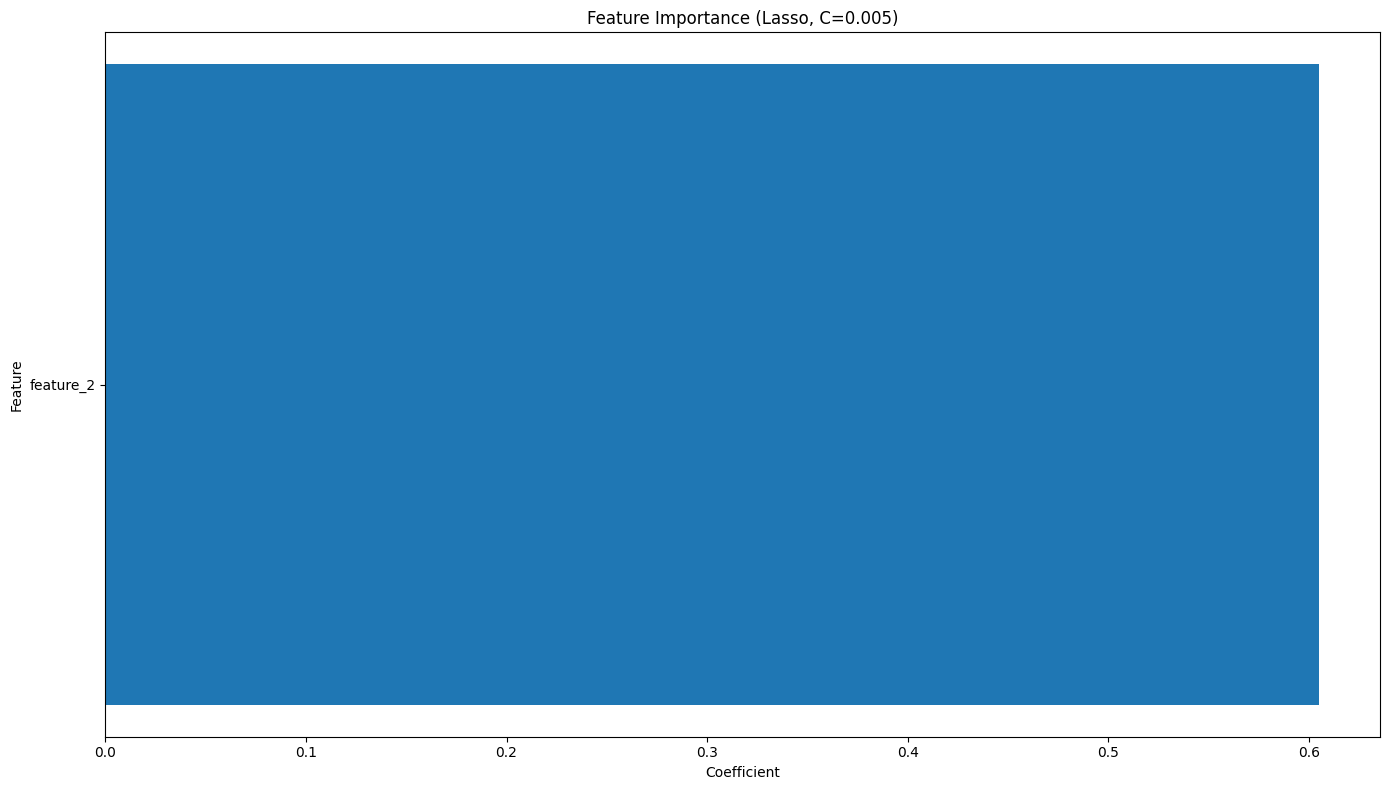

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from src.utils import calculate_custom_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Test different regularization strengths
c_values = [0.1, 0.05, 0.02, 0.01, 0.005, 0.001, 0.0005, 0.0001]
results = []

for c in c_values:
    # Initialize Logistic Regression with L1 regularization (Lasso)
    lasso_model = LogisticRegression(
        penalty='l1', 
        C=c,  # Lower C = stronger regularization
        solver='liblinear',
        random_state=RANDOM_STATE,
        max_iter=1000
    )
    
    # Train the model
    lasso_model.fit(X_train, y_train.values.ravel())
    
    # Get features with non-zero coefficients
    selected_features_mask = np.abs(lasso_model.coef_[0]) > 0
    selected_features = X_train.columns[selected_features_mask]
    
    # Make predictions
    y_train_pred = lasso_model.predict(X_train)
    y_train_pred_proba = lasso_model.predict_proba(X_train)[:, 1]
    y_val_pred = lasso_model.predict(X_val)
    y_val_pred_proba = lasso_model.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    results.append({
        'C': c,
        'Features Count': len(selected_features),
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Val Accuracy': accuracy_score(y_val, y_val_pred),
        'Train F1': f1_score(y_train, y_train_pred),
        'Val F1': f1_score(y_val, y_val_pred),
        'Train ROC AUC': roc_auc_score(y_train, y_train_pred_proba),
        'Val ROC AUC': roc_auc_score(y_val, y_val_pred_proba),
        'Custom Score': calculate_custom_score(y_val.values.ravel(), y_val_pred_proba, len(selected_features)),
        'Selected Features': list(selected_features)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the results
display(results_df[[
    'C', 'Features Count', 'Train Accuracy', 'Val Accuracy',
    'Train F1', 'Val F1', 'Train ROC AUC', 'Val ROC AUC', 'Custom Score'
]].style.highlight_max(subset=['Val Accuracy', 'Val F1', 'Val ROC AUC', 'Custom Score'], color='darkgreen')
.format({
    'Train Accuracy': '{:.4f}', 'Val Accuracy': '{:.4f}',
    'Train F1': '{:.4f}', 'Val F1': '{:.4f}',
    'Train ROC AUC': '{:.4f}', 'Val ROC AUC': '{:.4f}',
    'Custom Score': '€{:.2f}'
}))

# Get the best model based on custom score (where features count is not zero)
# best_idx = results_df['Custom Score'].idxmax()
best_idx = results_df[results_df['Features Count'] > 0]['Custom Score'].idxmax()
best_c = results_df.loc[best_idx, 'C']
best_features_count = results_df.loc[best_idx, 'Features Count']
best_features = results_df.loc[best_idx, 'Selected Features']

print(f"\nBest model: C={best_c} with {best_features_count} features")
print(f"Custom Score: €{results_df.loc[best_idx, 'Custom Score']:.2f}")

# Train the best model
best_lasso_model = LogisticRegression(
    penalty='l1',
    C=best_c,
    solver='liblinear',
    random_state=RANDOM_STATE,
    max_iter=1000
)
best_lasso_model.fit(X_train, y_train.values.ravel())

# Get feature importances from best model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_lasso_model.coef_[0]
})

# Sort by absolute coefficient value and filter non-zero
feature_importance = feature_importance[feature_importance['Coefficient'] != 0].sort_values(
    by='Coefficient', key=abs, ascending=False
).reset_index(drop=True)

# Display the most important features
display(feature_importance)

# Visualize feature importance
plt.figure(figsize=(14, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title(f'Feature Importance (Lasso, C={best_c})')
plt.tight_layout()
plt.show()

# Filter Methods (ANOVA / Mutual Information)

ANOVA F-test + Random Forest Results:


,k,Train Accuracy,Val Accuracy,Train F1,Val F1,Train ROC AUC,Val ROC AUC,Custom Score
0,1,0.7167,0.6990,0.7091,0.6919,0.7745,0.7196,€4690.00
1,2,0.7183,0.7000,0.7127,0.6951,0.7707,0.7269,€4490.00
2,5,0.7308,0.7060,0.7239,0.6994,0.7778,0.7335,€3890.00
3,10,0.7345,0.7080,0.7278,0.7014,0.7804,0.7334,€2890.00
4,15,0.7328,0.7060,0.7269,0.7000,0.7808,0.7361,€1890.00
5,20,0.7340,0.7060,0.7288,0.7012,0.7848,0.7354,€890.00
6,25,0.7320,0.7070,0.7268,0.7019,0.7909,0.7367,€-110.00
7,30,0.7308,0.7070,0.7255,0.7007,0.7907,0.7376,€-1110.00
8,50,0.7312,0.7060,0.7260,0.6994,0.7952,0.7319,€-5110.00
9,100,0.7288,0.7000,0.7231,0.6920,0.8012,0.7311,€-15110.00



Best ANOVA model: k=1
Custom Score: €4690.00


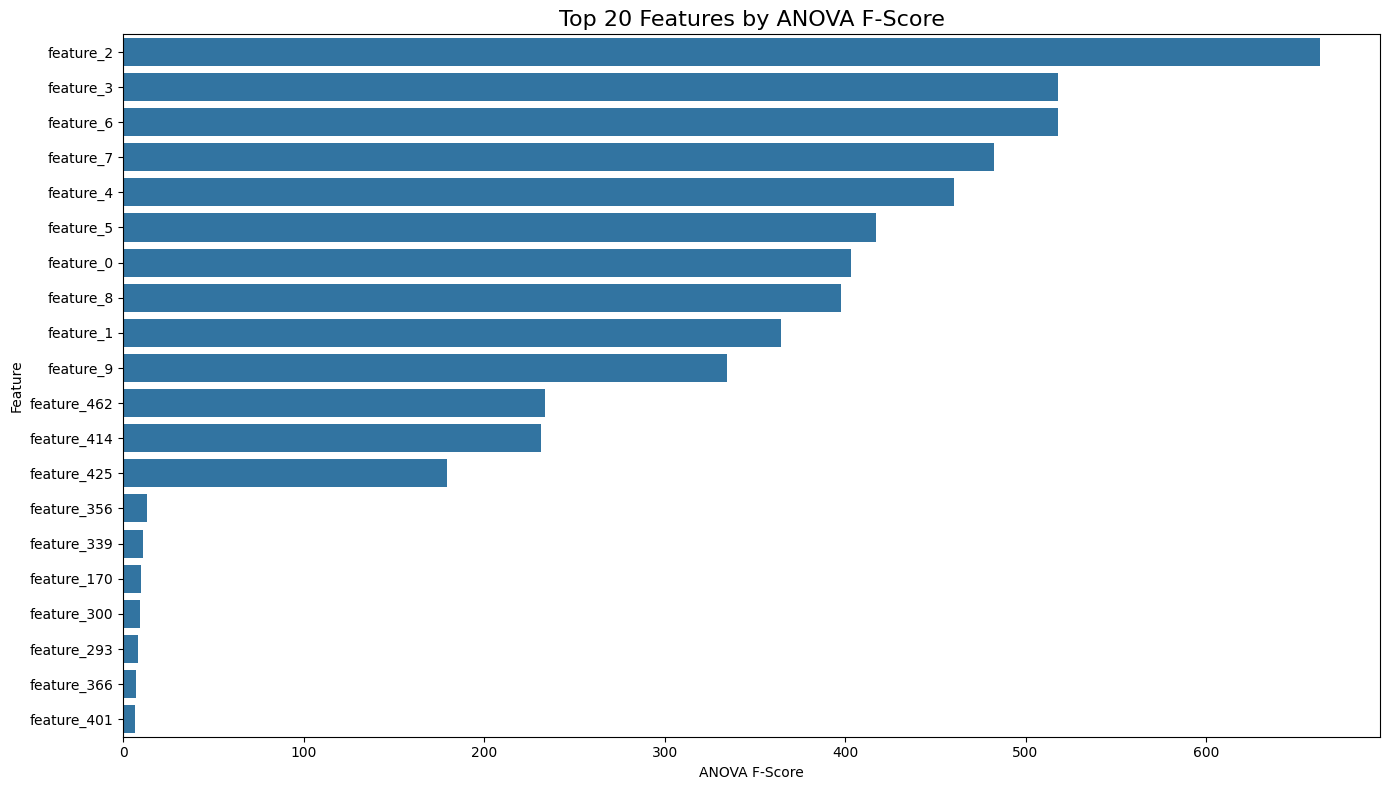

In [7]:
# Method 1: SelectKBest with ANOVA F-test
#-------------------------------------------------------
k_values = [1, 2, 5, 10, 15, 20, 25, 30, 50, 100]
anova_results = []

for k in k_values:
    # Select top k features using ANOVA F-test
    selector = SelectKBest(f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train.values.ravel())
    
    # Get selected feature names
    selected_indices = selector.get_support(indices=True)
    selected_features = X_train.columns[selected_indices].tolist()
    
    # Use RandomForest with selected features
    rf_model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=4,
        min_samples_split=4,
        min_samples_leaf=4,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    
    # Train on selected features
    X_train_selected = X_train[selected_features]
    X_val_selected = X_val[selected_features]
    rf_model.fit(X_train_selected, y_train.values.ravel())
    
    # Make predictions
    y_train_pred = rf_model.predict(X_train_selected)
    y_train_pred_proba = rf_model.predict_proba(X_train_selected)[:, 1]
    y_val_pred = rf_model.predict(X_val_selected)
    y_val_pred_proba = rf_model.predict_proba(X_val_selected)[:, 1]
    
    # Calculate metrics
    anova_results.append({
        'k': k,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Val Accuracy': accuracy_score(y_val, y_val_pred),
        'Train F1': f1_score(y_train, y_train_pred),
        'Val F1': f1_score(y_val, y_val_pred),
        'Train ROC AUC': roc_auc_score(y_train, y_train_pred_proba),
        'Val ROC AUC': roc_auc_score(y_val, y_val_pred_proba),
        'Custom Score': calculate_custom_score(y_val.values.ravel(), y_val_pred_proba, k),
        'Selected Features': selected_features
    })

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results)

# Display the results
print("ANOVA F-test + Random Forest Results:")
display(anova_df[[
    'k', 'Train Accuracy', 'Val Accuracy', 
    'Train F1', 'Val F1', 'Train ROC AUC', 'Val ROC AUC', 'Custom Score'
]].style.highlight_max(subset=['Val Accuracy', 'Val F1', 'Val ROC AUC', 'Custom Score'], color='darkgreen')
.format({
    'Train Accuracy': '{:.4f}', 'Val Accuracy': '{:.4f}',
    'Train F1': '{:.4f}', 'Val F1': '{:.4f}',
    'Train ROC AUC': '{:.4f}', 'Val ROC AUC': '{:.4f}',
    'Custom Score': '€{:.2f}'
}))

# Find best k based on custom score
best_k_idx = anova_df['Custom Score'].idxmax()
best_k = anova_df.loc[best_k_idx, 'k']
best_features_anova = anova_df.loc[best_k_idx, 'Selected Features']

print(f"\nBest ANOVA model: k={best_k}")
print(f"Custom Score: €{anova_df.loc[best_k_idx, 'Custom Score']:.2f}")

# Get ANOVA feature scores for visualization
selector = SelectKBest(f_classif, k='all')
selector.fit(X_train, y_train.values.ravel())
anova_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'ANOVA F-Score': selector.scores_,
    'p-value': selector.pvalues_
})
anova_scores = anova_scores.sort_values('ANOVA F-Score', ascending=False).reset_index(drop=True)

# Visualize top ANOVA features
plt.figure(figsize=(14, 8))
sns.barplot(x='ANOVA F-Score', y='Feature', data=anova_scores.head(20))
plt.title('Top 20 Features by ANOVA F-Score', fontsize=16)
plt.tight_layout()
plt.show()


Mutual Information + Random Forest Results:


,k,Train Accuracy,Val Accuracy,Train F1,Val F1,Train ROC AUC,Val ROC AUC,Custom Score
0,1,0.7167,0.6990,0.7091,0.6919,0.7745,0.7196,€4690.00
1,2,0.7147,0.7020,0.7083,0.6959,0.7734,0.7336,€4490.00
2,5,0.7285,0.7090,0.7220,0.7028,0.7788,0.7353,€3890.00
3,10,0.7342,0.7070,0.7282,0.7013,0.7808,0.7341,€2890.00
4,15,0.7328,0.7080,0.7274,0.7033,0.7799,0.7347,€1890.00
5,20,0.7320,0.7130,0.7264,0.7074,0.7841,0.7367,€890.00
6,25,0.7322,0.7070,0.7269,0.7007,0.7874,0.7351,€-110.00
7,30,0.7305,0.7080,0.7256,0.7002,0.7881,0.7352,€-1110.00
8,50,0.7285,0.7030,0.7238,0.6966,0.7927,0.7339,€-5110.00
9,100,0.7255,0.7000,0.7192,0.6920,0.7963,0.7317,€-15110.00



Best Mutual Information model: k=1
Custom Score: €4690.00


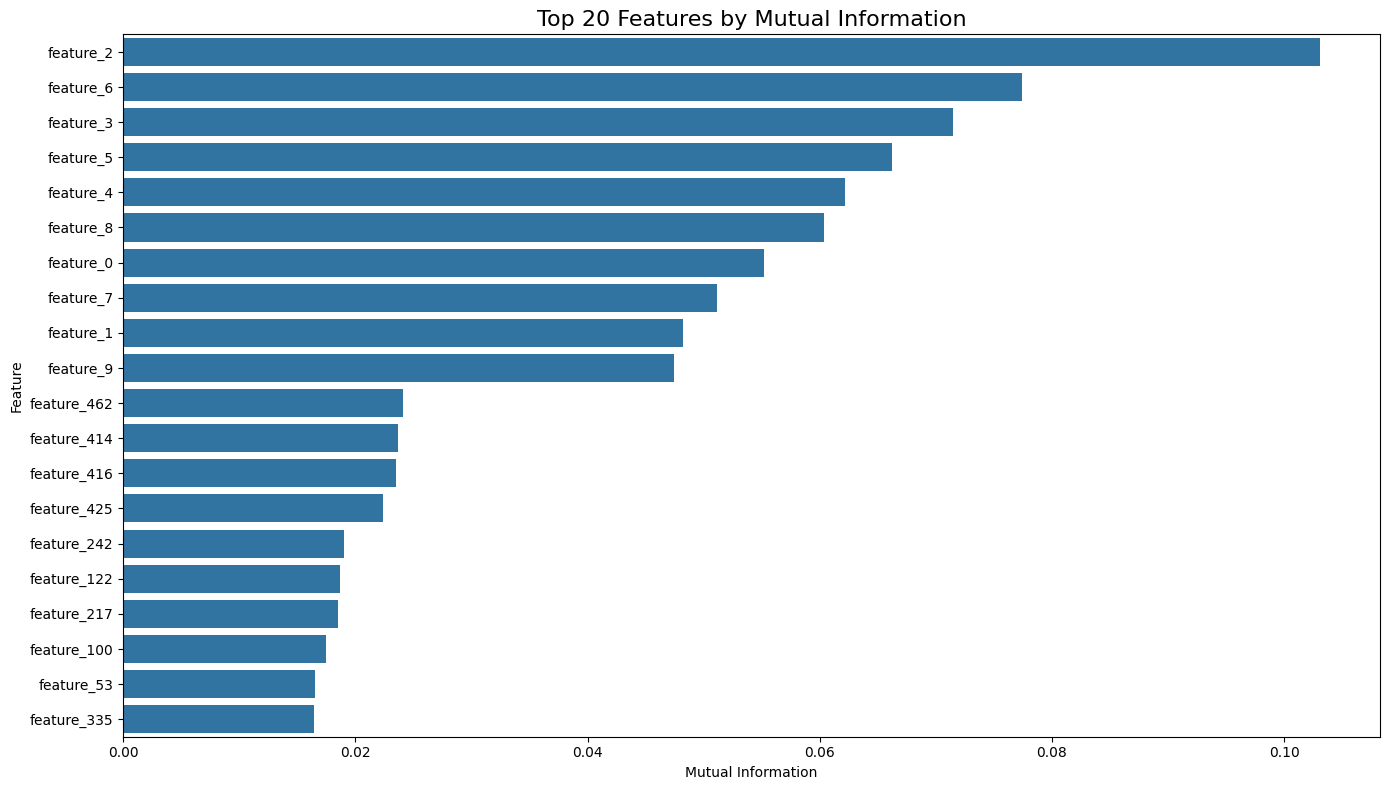


Method Comparison:


,Method,Best k,Val Accuracy,Val F1,Val ROC AUC,Custom Score
0,ANOVA F-test,1,0.6990,0.6919,0.7196,€4690.00
1,Mutual Information,1,0.6990,0.6919,0.7196,€4690.00



Feature overlap between methods: 1 features
Common features: {'feature_2'}


In [8]:

# Method 2: Mutual Information
#-------------------------------------------------------
k_values = [1, 2, 5, 10, 15, 20, 25, 30, 50, 100]
mi_results = []

for k in k_values:
    # Calculate mutual information scores
    mi_scores = mutual_info_classif(X_train, y_train.values.ravel(), random_state=RANDOM_STATE)
    
    # Get top k features based on mutual information
    selected_indices = np.argsort(mi_scores)[-k:]
    selected_features = X_train.columns[selected_indices].tolist()
    
    # Use RandomForest with selected features
    rf_model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=4,
        min_samples_split=4,
        min_samples_leaf=4,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    
    # Train on selected features
    X_train_selected = X_train[selected_features]
    X_val_selected = X_val[selected_features]
    rf_model.fit(X_train_selected, y_train.values.ravel())
    
    # Make predictions
    y_train_pred = rf_model.predict(X_train_selected)
    y_train_pred_proba = rf_model.predict_proba(X_train_selected)[:, 1]
    y_val_pred = rf_model.predict(X_val_selected)
    y_val_pred_proba = rf_model.predict_proba(X_val_selected)[:, 1]
    
    # Calculate metrics
    mi_results.append({
        'k': k,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Val Accuracy': accuracy_score(y_val, y_val_pred),
        'Train F1': f1_score(y_train, y_train_pred),
        'Val F1': f1_score(y_val, y_val_pred),
        'Train ROC AUC': roc_auc_score(y_train, y_train_pred_proba),
        'Val ROC AUC': roc_auc_score(y_val, y_val_pred_proba),
        'Custom Score': calculate_custom_score(y_val.values.ravel(), y_val_pred_proba, k),
        'Selected Features': selected_features
    })

# Convert to DataFrame
mi_df = pd.DataFrame(mi_results)

# Display the results
print("Mutual Information + Random Forest Results:")
display(mi_df[[
    'k', 'Train Accuracy', 'Val Accuracy', 
    'Train F1', 'Val F1', 'Train ROC AUC', 'Val ROC AUC', 'Custom Score'
]].style.highlight_max(subset=['Val Accuracy', 'Val F1', 'Val ROC AUC', 'Custom Score'], color='darkgreen')
.format({
    'Train Accuracy': '{:.4f}', 'Val Accuracy': '{:.4f}',
    'Train F1': '{:.4f}', 'Val F1': '{:.4f}',
    'Train ROC AUC': '{:.4f}', 'Val ROC AUC': '{:.4f}',
    'Custom Score': '€{:.2f}'
}))

# Find best k based on custom score
best_k_idx_mi = mi_df['Custom Score'].idxmax()
best_k_mi = mi_df.loc[best_k_idx_mi, 'k']
best_features_mi = mi_df.loc[best_k_idx_mi, 'Selected Features']

print(f"\nBest Mutual Information model: k={best_k_mi}")
print(f"Custom Score: €{mi_df.loc[best_k_idx_mi, 'Custom Score']:.2f}")

# Get mutual information feature scores for visualization
mi_scores = mutual_info_classif(X_train, y_train.values.ravel(), random_state=RANDOM_STATE)
mi_feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual Information': mi_scores
})
mi_feature_scores = mi_feature_scores.sort_values('Mutual Information', ascending=False).reset_index(drop=True)

# Visualize top MI features
plt.figure(figsize=(14, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mi_feature_scores.head(20))
plt.title('Top 20 Features by Mutual Information', fontsize=16)
plt.tight_layout()
plt.show()

# Compare the methods
comparison_df = pd.DataFrame({
    'Method': ['ANOVA F-test', 'Mutual Information'],
    'Best k': [best_k, best_k_mi],
    'Val Accuracy': [
        anova_df.loc[best_k_idx, 'Val Accuracy'],
        mi_df.loc[best_k_idx_mi, 'Val Accuracy']
    ],
    'Val F1': [
        anova_df.loc[best_k_idx, 'Val F1'],
        mi_df.loc[best_k_idx_mi, 'Val F1']
    ],
    'Val ROC AUC': [
        anova_df.loc[best_k_idx, 'Val ROC AUC'],
        mi_df.loc[best_k_idx_mi, 'Val ROC AUC']
    ],
    'Custom Score': [
        anova_df.loc[best_k_idx, 'Custom Score'],
        mi_df.loc[best_k_idx_mi, 'Custom Score']
    ]
})

print("\nMethod Comparison:")
display(comparison_df.style.highlight_max(subset=['Val Accuracy', 'Val F1', 'Val ROC AUC', 'Custom Score'], color='darkgreen')
      .format({
          'Val Accuracy': '{:.4f}', 'Val F1': '{:.4f}', 'Val ROC AUC': '{:.4f}',
          'Custom Score': '€{:.2f}'
      }))

# Compare feature overlap between methods
anova_features_set = set(best_features_anova)
mi_features_set = set(best_features_mi)
common_features = anova_features_set.intersection(mi_features_set)

print(f"\nFeature overlap between methods: {len(common_features)} features")
print(f"Common features: {common_features}")